# Station evaluation

In [19]:
import collections
import glob

import lxml
import lxml.etree
import lxml.objectify

In [14]:
timetables_files = glob.glob("timetables/timetable_*xml")

In [21]:
tt_file = open("timetables/timetable_8000273_05.xml", "r")
tt_xml = lxml.objectify.parse(tt_file)
lxml.objectify.dump(tt_xml.getroot())

"timetable = None [ObjectifiedElement]\n  * station = 'Muldenberg Floßplatz'\n    s = None [ObjectifiedElement]\n      * id = '3991938303171863868-2110270532-4'\n        tl = '' [StringElement]\n          * c = 'VBG'\n          * f = 'D'\n          * n = '20802'\n          * o = 'RD'\n          * t = 'p'\n        ar = '' [StringElement]\n          * l = 'RB1'\n          * pp = '1'\n          * ppth = 'Zwotental|Schöneck(Vogtl) Ferienpark|Schöneck(Vogtl)'\n          * pt = '2110270544'\n        dp = '' [StringElement]\n          * l = 'RB1'\n          * pp = '1'\n          * ppth = 'Grünbach(Vogtl)|Falkenstein(Vogtl)|Ellefeld|Auerbach(V) unt Bf|Rodewisch|Lengenfeld(Vogtl)|Irfersgrün|Voigtsgrün|Ebersbrunn|Stenn|Zwickau(Sachs)Hbf|Zwickau Stadthalle|Zwickau Zentrum'\n          * pt = '2110270544'\n    s = None [ObjectifiedElement]\n      * id = '4048785167705909746-2110270503-3'\n        tl = '' [StringElement]\n          * c = 'VBG'\n          * f = 'D'\n          * n = '20801'\n         

In [25]:
{connection.get("id") for connection in tt_xml.getroot().getchildren()}

{'3991938303171863868-2110270532-4', '4048785167705909746-2110270503-3'}

In [26]:
tt_xml.getroot().get("station")

'Muldenberg Floßplatz'

In [32]:
station_departures = collections.defaultdict(set)
for tt_file_name in timetables_files:
    tt_file = open(tt_file_name, "r")
    try:
        tt_xml = lxml.objectify.parse(tt_file)
    
        station = tt_xml.getroot().get("station")
        station_departures[station] |= {connection.get("id") for connection in tt_xml.getroot().getchildren()}
    except lxml.etree.XMLSyntaxError:
        print("Could not parse", tt_file_name)
    
    tt_file.close()

Could not parse timetables/timetable_8011407_00.xml
Could not parse timetables/timetable_8011407_01.xml
Could not parse timetables/timetable_8011407_02.xml
Could not parse timetables/timetable_8011407_03.xml
Could not parse timetables/timetable_8011407_04.xml
Could not parse timetables/timetable_8011407_05.xml
Could not parse timetables/timetable_8011407_06.xml
Could not parse timetables/timetable_8011407_07.xml
Could not parse timetables/timetable_8011407_08.xml
Could not parse timetables/timetable_8011407_09.xml
Could not parse timetables/timetable_8011407_10.xml
Could not parse timetables/timetable_8011407_11.xml
Could not parse timetables/timetable_8011407_12.xml
Could not parse timetables/timetable_8011407_13.xml
Could not parse timetables/timetable_8011407_14.xml
Could not parse timetables/timetable_8011407_15.xml
Could not parse timetables/timetable_8011407_16.xml
Could not parse timetables/timetable_8011407_17.xml
Could not parse timetables/timetable_8011407_18.xml
Could not pa

In [33]:
station_departures

defaultdict(set,
            {None: set(),
             'Muldenberg Floßplatz': {'-1185830877265649410-2110271432-4',
              '-1439860976133880443-2110272116-4',
              '-3680084713653827129-2110271532-4',
              '-4673845009181939478-2110271708-13',
              '-528787466545690111-2110271932-4',
              '-5505861707631077630-2110271732-4',
              '-570781569235220717-2110271232-4',
              '-7138277386379506903-2110271032-4',
              '-7347542083848515027-2110271607-14',
              '-8251453242568204915-2110270632-4',
              '-8348892531325271718-2110271332-4',
              '-9002325811798804889-2110272059-14',
              '1186428328730718696-2110270732-4',
              '1615381898829004154-2110271832-4',
              '1825728141358681630-2110271508-13',
              '2225312545745446531-2110271932-7',
              '2419965195301141987-2110271207-14',
              '3415490259037769703-2110270607-13',
              '34

In [35]:
station_ndeps = {station: len(station_departures[station]) for station in station_departures.keys()}
station_ndeps

{None: 0,
 'Muldenberg Floßplatz': 33,
 'Schöneck(Vogtl) Ferienpark': 60,
 'Adorf(Vogtl)': 34,
 'Arnsdorf(Dresden)': 91,
 'Leipzig Anger-Crottendorf': 76,
 'Auerbach(V) ob Bf': 34,
 'Auerbach(V) unt Bf': 32,
 'Bad Schandau': 130,
 'Bautzen': 71,
 'Kürbitz': 58,
 'Berthelsdorf(Erzgeb)': 16,
 'Beucha': 58,
 'Bischofswerda': 113,
 'Borsdorf(Sachs)': 174,
 'Coswig(b Dresden)': 228,
 'Cranzahl': 22,
 'Delitzsch unt Bf': 111,
 'Döbeln Hbf': 72,
 'Dresden Hbf': 617,
 'Dresden-Klotzsche': 243,
 'Dresden-Neustadt': 488,
 'Dürrröhrsdorf': 34,
 'Ebersbach(Sachs)': 41,
 'Eibau': 23,
 'Eilenburg': 112,
 'Falkenstein(Vogtl)': 68,
 'Flöha': 140,
 'Freiberg(Sachs)': 105,
 'Freital-Hainsberg': 88,
 'Geithain': 110,
 'Glauchau(Sachs)': 164,
 'Glauchau-Schönbörnchen': 69,
 'Görlitz': 196,
 'Großbothen': 34,
 'Eilenburg Ost': 67,
 'Heidenau': 210,
 'Herlasgrün': 76,
 'Horka': 81,
 'Hoyerswerda': 57,
 'Chemnitz Hbf': 341,
 'Chemnitz Süd': 118,
 'Leipzig Karlsruher Str': 82,
 'Leipzig Hbf': 442,
 'Leipzig-C

In [40]:
station_ndeps.pop(None)

0

In [41]:
import pandas as pd

In [44]:
df = pd.DataFrame(station_ndeps.items(), columns=["station", "n_departures"])
df

,station,n_departures
0,Muldenberg Floßplatz,33
1,Schöneck(Vogtl) Ferienpark,60
2,Adorf(Vogtl),34
3,Arnsdorf(Dresden),91
4,Leipzig Anger-Crottendorf,76
...,...,...
391,Chemnitz Küchwald,38
392,Plauen(Vogtl) Mitte,25
393,Delitzsch ob Bf,29
394,Leipzig Coppiplatz,82


In [46]:
import sklearn.preprocessing

In [69]:
mm_scaler = sklearn.preprocessing.MinMaxScaler()
departures_scaled = mm_scaler.fit_transform(df.n_departures.to_numpy().reshape(-1, 1))
df["departures_scaled"] = departures_scaled

In [70]:
df["departures_ratio"] = df.n_departures / 24

In [71]:
df

,station,n_departures,departures_scaled,departures_ratio
0,Muldenberg Floßplatz,33,0.047308,1.375000
1,Schöneck(Vogtl) Ferienpark,60,0.091354,2.500000
2,Adorf(Vogtl),34,0.048940,1.416667
3,Arnsdorf(Dresden),91,0.141925,3.791667
4,Leipzig Anger-Crottendorf,76,0.117455,3.166667
...,...,...,...,...
391,Chemnitz Küchwald,38,0.055465,1.583333
392,Plauen(Vogtl) Mitte,25,0.034258,1.041667
393,Delitzsch ob Bf,29,0.040783,1.208333
394,Leipzig Coppiplatz,82,0.127243,3.416667


In [73]:
df.to_csv("timetables/station_departures.csv", index=False)

---

## Some data set analysis

### First up, Departures

In [1]:
import pandas as pd
dep_df = pd.read_csv("timetables/station_departures.csv")
dep_df

,station,n_departures,departures_scaled,departures_ratio
0,Muldenberg Floßplatz,33,0.047308,1.375000
1,Schöneck(Vogtl) Ferienpark,60,0.091354,2.500000
2,Adorf(Vogtl),34,0.048940,1.416667
3,Arnsdorf(Dresden),91,0.141925,3.791667
4,Leipzig Anger-Crottendorf,76,0.117455,3.166667
...,...,...,...,...
391,Chemnitz Küchwald,38,0.055465,1.583333
392,Plauen(Vogtl) Mitte,25,0.034258,1.041667
393,Delitzsch ob Bf,29,0.040783,1.208333
394,Leipzig Coppiplatz,82,0.127243,3.416667


<AxesSubplot:>

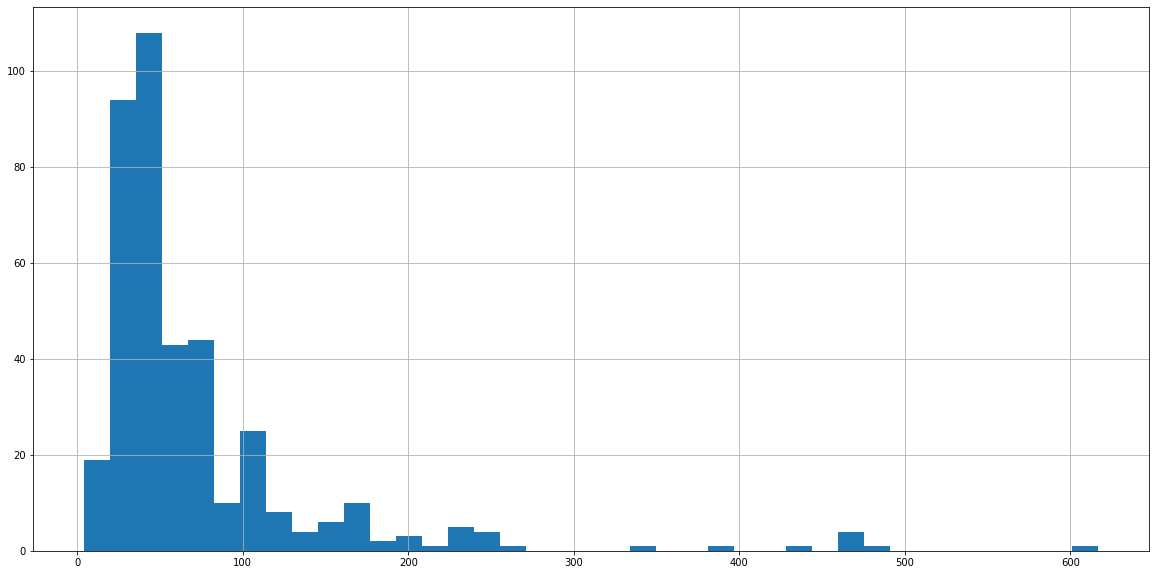

In [6]:
dep_df.n_departures.hist(bins=int(len(dep_df) / 10), figsize=(20, 10))

### Secondly, Mittelzentren/Oberzentren routes

In [7]:
mz_df = pd.read_csv("timetables/routes_mittelzentren.csv")
mz_df

,station,target,changes,stops
0,Weida,Leipzig-Knauthain,0,9
1,Roßlau(Elbe),Delitzsch unt Bf,0,3
2,Kodersdorf,Görlitz,0,0
3,Königsborn,Delitzsch unt Bf,0,8
4,Weickersdorf(Sachs),Bautzen,0,1
...,...,...,...,...
926,Wurzen,Wurzen,0,0
927,Chemnitz Stadlerplatz,Chemnitz Stadlerplatz,0,0
928,Velky Senov zast.,Dresden Hbf,1,12
929,Plauen(Vogtl)West,Plauen(Vogtl)West,0,0


<AxesSubplot:>

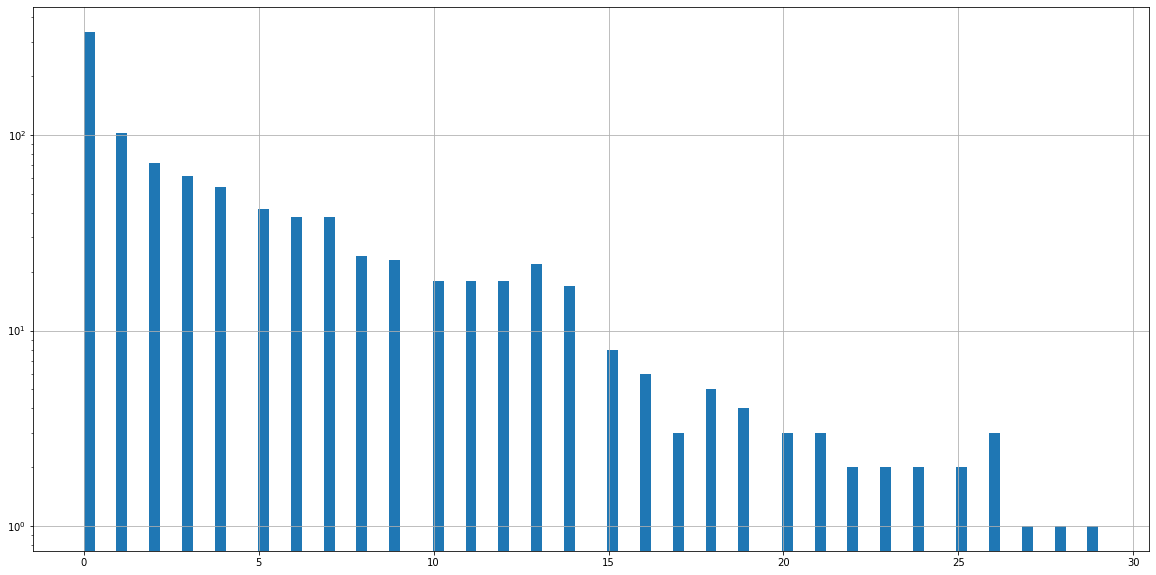

In [12]:
mz_df.stops.hist(bins=int(len(mz_df)/10), figsize=(20, 10), log=True)

In [24]:
long_mz_routes = mz_df.stops.quantile(0.95)
long_mz_df = mz_df[mz_df.stops >= long_mz_routes]
long_mz_df

,station,target,changes,stops
11,Neudietendorf,Leipzig-Miltitz,0,14
12,Stockheim(Oberfr),Leipzig Hbf,0,15
23,Norddeich,Leipzig/Halle Flughafen,0,18
29,Sluknov,Dresden Hbf,1,14
40,Förtschendorf,Leipzig Hbf,0,14
...,...,...,...,...
880,Emden Hbf,Leipzig/Halle Flughafen,0,15
882,Seebergen,Leipzig-Miltitz,0,16
900,Unterwellenborn,Leipzig-Knauthain,0,14
911,Hirschaid,Leipzig Hbf,0,28


In [20]:
oz_df = pd.read_csv("timetables/routes_oberzentren.csv")
oz_df

,station,target,changes,stops
0,Weida,Leipzig-Knauthain,0,9
1,Roßlau(Elbe),Leipzig Messe,0,4
2,Kodersdorf,Görlitz,0,0
3,Königsborn,Leipzig Messe,0,9
4,Weickersdorf(Sachs),Bautzen,0,1
...,...,...,...,...
926,Wurzen,Leipzig-Engelsdorf,0,1
927,Chemnitz Stadlerplatz,Chemnitz Stadlerplatz,0,0
928,Velky Senov zast.,Dresden Hbf,1,12
929,Plauen(Vogtl)West,Plauen(Vogtl)West,0,0


<AxesSubplot:>

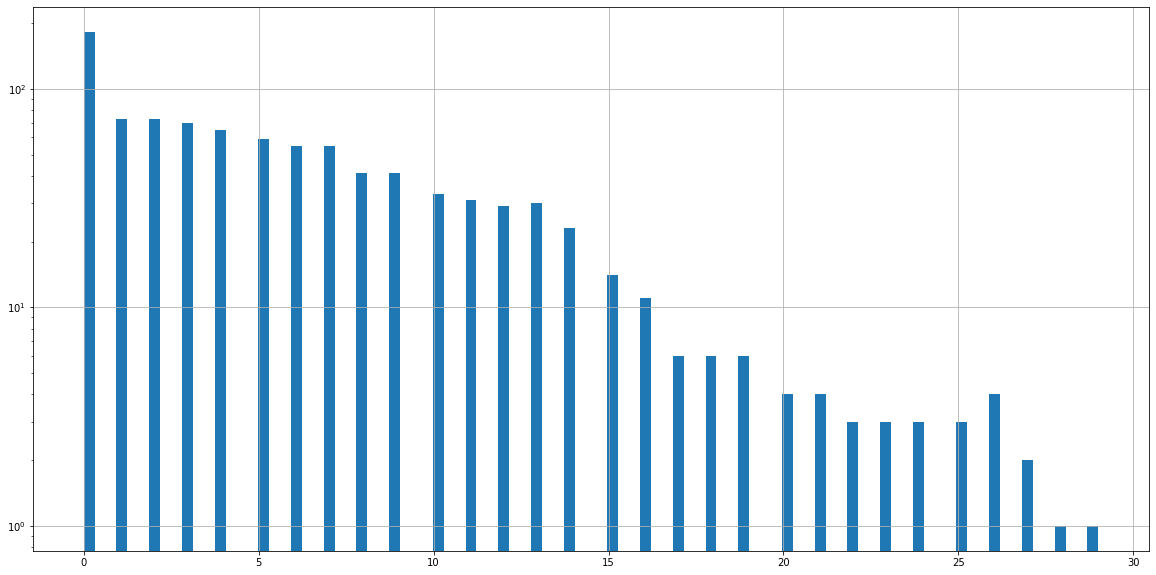

In [21]:
oz_df.stops.hist(bins=int(len(mz_df)/10), figsize=(20, 10), log=True)

In [23]:
long_oz_routes = mz_df.stops.quantile(0.95)
long_oz_df = oz_df[oz_df.stops >= long_oz_routes]
long_oz_df

,station,target,changes,stops
5,Blönsdorf,Leipzig Messe,0,15
11,Neudietendorf,Leipzig-Miltitz,0,14
12,Stockheim(Oberfr),Leipzig Hbf,0,15
23,Norddeich,Leipzig/Halle Flughafen,0,18
29,Sluknov,Dresden Hbf,1,14
...,...,...,...,...
900,Unterwellenborn,Leipzig-Knauthain,0,14
911,Hirschaid,Leipzig Hbf,0,28
918,Tiefenau,Chemnitz Hbf,0,14
924,Küps,Leipzig Hbf,0,18


In [30]:
long_routes_df = long_mz_df.merge(long_oz_df, on="station", suffixes=("_mz", "_oz"))
long_routes_df

,station,target_mz,changes_mz,stops_mz,target_oz,changes_oz,stops_oz
0,Neudietendorf,Leipzig-Miltitz,0,14,Leipzig-Miltitz,0,14
1,Stockheim(Oberfr),Leipzig Hbf,0,15,Leipzig Hbf,0,15
2,Norddeich,Leipzig/Halle Flughafen,0,18,Leipzig/Halle Flughafen,0,18
3,Sluknov,Dresden Hbf,1,14,Dresden Hbf,1,14
4,Förtschendorf,Leipzig Hbf,0,14,Leipzig Hbf,0,14
...,...,...,...,...,...,...,...
58,Emden Hbf,Leipzig/Halle Flughafen,0,15,Leipzig/Halle Flughafen,0,15
59,Seebergen,Leipzig-Miltitz,0,16,Leipzig-Miltitz,0,16
60,Unterwellenborn,Leipzig-Knauthain,0,14,Leipzig-Knauthain,0,14
61,Hirschaid,Leipzig Hbf,0,28,Leipzig Hbf,0,28


In [31]:
len(long_routes_df) == len(long_mz_df)

True

In [33]:
long_routes_df[long_routes_df.target_mz != long_routes_df.target_oz]

,station,target_mz,changes_mz,stops_mz,target_oz,changes_oz,stops_oz
54,Jüterbog,Delitzsch unt Bf,0,14,Leipzig Messe,0,17
